In [1]:
from sklearn.cluster import KMeans
import metrics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics

Using TensorFlow backend.
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

look_back = 50

In [6]:
path = glob.glob(r'C:\Keras_Deep_Clustering\csv_trafficnet_splitted\*.csv')


In [11]:
X_all = np.empty((1, 50, 28))
Y_all = np.empty((1,))

for i in range(1,13):
    print(path[i])
    
    Following = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu',
                                              'SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight',
                                              'LaneHeading','Following','o1','o2','o3','r1','r2','r3','rr1',
                                              'rr2','rr3','t1','t2','t3','tt1','tt2','tt3','tt5','c1','c2','c3'])
    Following.fillna(-1, inplace=True)
    
    
    
        
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu',
                                  'AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2',
                                  'o3','r1','r2','r3','rr1','rr2','rr3','t1','t2','t3','tt1','tt2','tt3',
                                  'tt5','c1','c2','c3']])

  
    dimof_output = 1
    dimof_input = X_train.shape[1]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

C:\Keras_Deep_Clustering\csv_trafficnet_splitted\100001-150000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\150001-200000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\200001-250000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\250001-300000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\300001-350000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\350001-400000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\400001-450000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\450001-500000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted\500001-550000.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C

In [12]:
Y_all[0]=0
len(Y_all)

599401

In [13]:
sum(Y_all)

263080.0

In [14]:
np.count_nonzero(np.isnan(Y_all))

0

In [15]:
x_all = X_all.reshape((X_all.shape[0], -1))
x_all

array([[ 1.25324351e-311,  1.25324543e-311,  1.25324642e-311, ...,
         1.25325259e-311,  1.25325259e-311,  1.25325259e-311],
       [-1.80223581e+000,  1.16683945e+000, -1.97665533e+000, ...,
         1.16683945e+000, -2.30545886e+000, -8.61673737e-003],
       [-1.80223581e+000,  1.16683945e+000, -1.98794036e+000, ...,
         1.16683945e+000, -2.30384065e+000, -8.61673737e-003],
       ...,
       [ 5.44824387e-001,  4.40155764e-001,  2.73857039e-001, ...,
         4.40155764e-001,  3.81181929e-001,  2.79003867e-001],
       [ 5.44824387e-001,  4.40155764e-001,  2.86357950e-001, ...,
         4.40155764e-001,  3.81181929e-001, -5.70296746e-005],
       [ 5.44824387e-001,  4.40155764e-001,  2.93675556e-001, ...,
         4.40155764e-001,  3.89719136e-001, -5.70296746e-005]])

In [16]:
x_all = x_all.astype(np.uint8)
x_all.nbytes

119880200

In [17]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(x_all)

In [18]:
x_all = np.round(standardized_X , 4)

# K-means as baseline

In [19]:
from sklearn.cluster import KMeans


kmeans_under = KMeans(n_clusters=2, n_init=20 , n_jobs=4)   
y_pred_kmeans = kmeans_under.fit_predict(x_all)

In [20]:
y_pred_kmeans.shape

(599401,)

In [21]:
sum(y_pred_kmeans)

493294

In [22]:
sum(Y_all)

263080.0

In [23]:
metrics.acc(Y_all, y_pred_kmeans)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.5416407380034401

In [24]:
print(y_pred_kmeans)

[1 0 0 ... 1 1 1]


In [25]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_all.round() , y_pred_kmeans )
conf_mat

array([[ 58884, 277437],
       [ 47223, 215857]], dtype=int64)

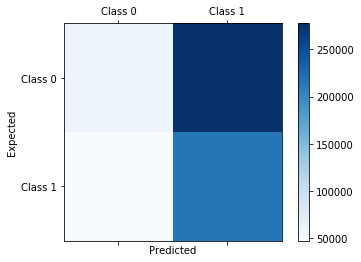

In [26]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat , cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyper parameters

In [27]:
def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)


    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [28]:
dims = [x_all.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = r'C:\Users\YALAVI\Anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\tests\results'

In [29]:
autoencoder, encoder = autoencoder(dims, init=init)

In [30]:
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()

overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 20)

### Pre-train autoencoder

In [31]:


autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x_all, x_all, batch_size=batch_size, epochs=pretrain_epochs , callbacks=[overfitCallback] ) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')



Epoch 1/100
599401/599401 [==============================] - 287s 480us/step - loss: 0.0796
Epoch 2/100
599401/599401 [==============================] - 288s 480us/step - loss: 0.0291
Epoch 3/100
599401/599401 [==============================] - 291s 485us/step - loss: 0.0227
Epoch 4/100
599401/599401 [==============================] - 273s 456us/step - loss: 0.0194
Epoch 5/100
599401/599401 [==============================] - 279s 466us/step - loss: 0.0175
Epoch 6/100
599401/599401 [==============================] - 278s 464us/step - loss: 0.0160
Epoch 7/100
599401/599401 [==============================] - 280s 467us/step - loss: 0.0148
Epoch 8/100
599401/599401 [==============================] - 306s 511us/step - loss: 0.0140
Epoch 9/100
599401/599401 [==============================] - 310s 517us/step - loss: 0.0133
Epoch 10/100
599401/599401 [==============================] - 265s 443us/step - loss: 0.0127
Epoch 11/100
599401/599401 [==============================] - 262s 437us/step -

In [32]:

autoencoder.save_weights(save_dir + '/ae_weights.h5')

 #### Load the pre-trained auto encoder weights

In [33]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

### ClusteringLayer

In [34]:
class ClusteringLayer(Layer):

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) 
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [35]:
n_clusters = 2
clustering_layer = ClusteringLayer(n_clusters , name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [37]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: initialize cluster centers using k-means

In [38]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x_all))

In [39]:
y_pred_last = np.copy(y_pred)

In [40]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### Step 2: deep clustering
Compute p_i by first raising q_i to the second power and then normalizing by frequency per cluster:

In [41]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [42]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x_all.shape[0])

In [43]:
tol = 0.001 

### Start training

In [44]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x_all, verbose=0)
        p = target_distribution(q)  
        
        y_pred = q.argmax(1)
        if Y_all is not None:
            acc = np.round(metrics.acc(Y_all, y_pred), 5)
            nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
            ari = np.round(metrics.ari(Y_all, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x_all.shape[0])]
    loss = model.train_on_batch(x=x_all[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x_all.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_final.h5')

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.56943, nmi = 0.00569, ari = 0.01395  ; loss= 0


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.55876, nmi = 0.00334, ari = 0.00995  ; loss= 0.00358


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.54534, nmi = 0.00315, ari = 0.00747  ; loss= 0.00058


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.54437, nmi = 0.00318, ari = 0.00726  ; loss= 0.0105


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.54403, nmi = 0.00329, ari = 0.00724  ; loss= 0.01627


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 700: acc = 0.54386, nmi = 0.00329, ari = 0.00720  ; loss= 0.00283


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 840: acc = 0.54376, nmi = 0.00333, ari = 0.00719  ; loss= 0.01118


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 980: acc = 0.54363, nmi = 0.00338, ari = 0.00718  ; loss= 0.01831


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1120: acc = 0.55249, nmi = 0.00467, ari = 0.01024  ; loss= 0.01934


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1260: acc = 0.55237, nmi = 0.00469, ari = 0.01021  ; loss= 0.01448


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1400: acc = 0.55256, nmi = 0.00477, ari = 0.01031  ; loss= 0.0126


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1540: acc = 0.55256, nmi = 0.00478, ari = 0.01031  ; loss= 0.01333
delta_label  0.0007624278237774045 < tol  0.001
Reached tolerance threshold. Stopping training.


### Load the clustering model trained weights

In [45]:
model.load_weights(save_dir + '/DEC_model_final.h5')

### Final Evaluation

In [46]:
q = model.predict(x_all, verbose=0)
p = target_distribution(q)  

y_pred = q.argmax(1)
if Y_all is not None:
    acc = np.round(metrics.acc(Y_all, y_pred), 5)
    nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
    ari = np.round(metrics.ari(Y_all, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Acc = 0.55256, nmi = 0.00478, ari = 0.01031  ; loss= 0.01333


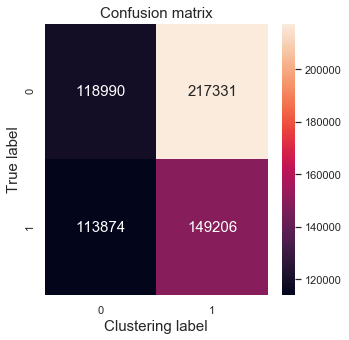

In [47]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=1)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_all, y_pred.round())

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 15});
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()